## Problem Statement:


Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

In [36]:
# Importing required libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import warnings 
warnings.simplefilter(action='ignore',category=FutureWarning)


In [37]:
# Importing dataset
hr = pd.read_csv(r"C:\Users\SREEDHAR\Documents\Data science\ML projects\WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [38]:
# Checking the dataset
hr.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [39]:
hr.shape

(1470, 35)

In [40]:
hr.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

Attrition is the Target column which has yes and no values. 
we have to predict if the employee will leave the company or not,  
hence it is a classification problem.

In [41]:
# Checking info
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

8 columns are object type,in which 1 column is our target ( Attrition),rest 7 columns listed below need to be converted into integers before going into model building.  

* BusinessTravel

* Department                

*  EducationField

* Gender - 

* JobRole 

* MaritalStatus

* Over18

* OverTime

Also , We can drop following columns  - 

* Employee count
* Employee number 
* Std_hours 
* Over18 

In [42]:
# Checking the statistics
hr.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Standerd deviation is zero for employee count and Working hours. Hence it indicates that they have single unique value.

In [43]:
# checking for null values
hr.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

Confirming no null values present in our dataset

In [44]:
#columns data
hr.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [45]:
# Dropping unnecessary columns
hr = hr.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'], axis = 1)

In [46]:
hr.shape

(1470, 31)

In [47]:
# Checking the target column

hr['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [48]:
# Prinig the unique values in each column
for column in hr.columns:
    print(f"{column}: No of unique values {hr[column].nunique()}")

Age: No of unique values 43
Attrition: No of unique values 2
BusinessTravel: No of unique values 3
DailyRate: No of unique values 886
Department: No of unique values 3
DistanceFromHome: No of unique values 29
Education: No of unique values 5
EducationField: No of unique values 6
EnvironmentSatisfaction: No of unique values 4
Gender: No of unique values 2
HourlyRate: No of unique values 71
JobInvolvement: No of unique values 4
JobLevel: No of unique values 5
JobRole: No of unique values 9
JobSatisfaction: No of unique values 4
MaritalStatus: No of unique values 3
MonthlyIncome: No of unique values 1349
MonthlyRate: No of unique values 1427
NumCompaniesWorked: No of unique values 10
OverTime: No of unique values 2
PercentSalaryHike: No of unique values 15
PerformanceRating: No of unique values 2
RelationshipSatisfaction: No of unique values 4
StockOptionLevel: No of unique values 4
TotalWorkingYears: No of unique values 40
TrainingTimesLastYear: No of unique values 7
WorkLifeBalance: No 

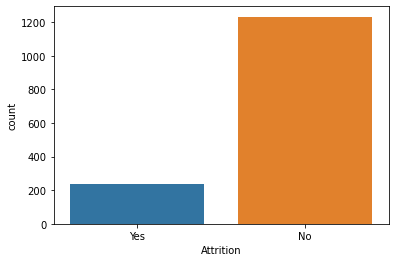

In [49]:
sns.countplot(hr['Attrition'])
plt.show()

target column has 1233 employees who have not left the job while 237 employees who have left the job.

<AxesSubplot:xlabel='Age', ylabel='Density'>

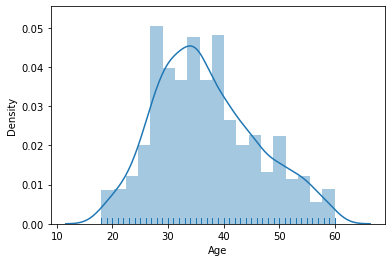

In [50]:
sns.distplot(hr['Age'],rug =True)

age data is normally disitrubuted and more people aging from 25-45 working.

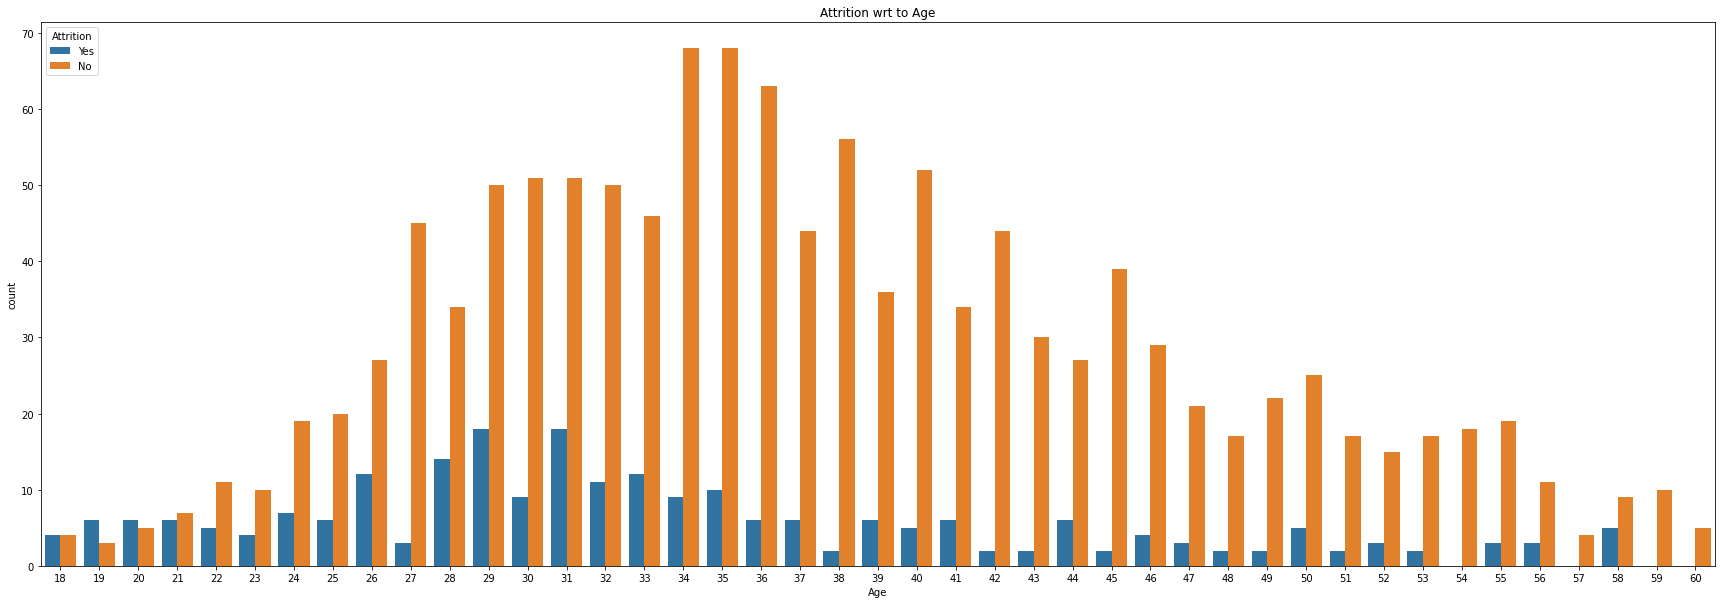

In [51]:
plt.figure(figsize = (30,10))
plt.title('Attrition wrt to Age')
sns.countplot(x = 'Age', hue = 'Attrition', data = hr)
plt.show()

Attrition rate is increases for employess with age 22 to mid thirties and again decreases,  people with older age do not tend to leave the job.

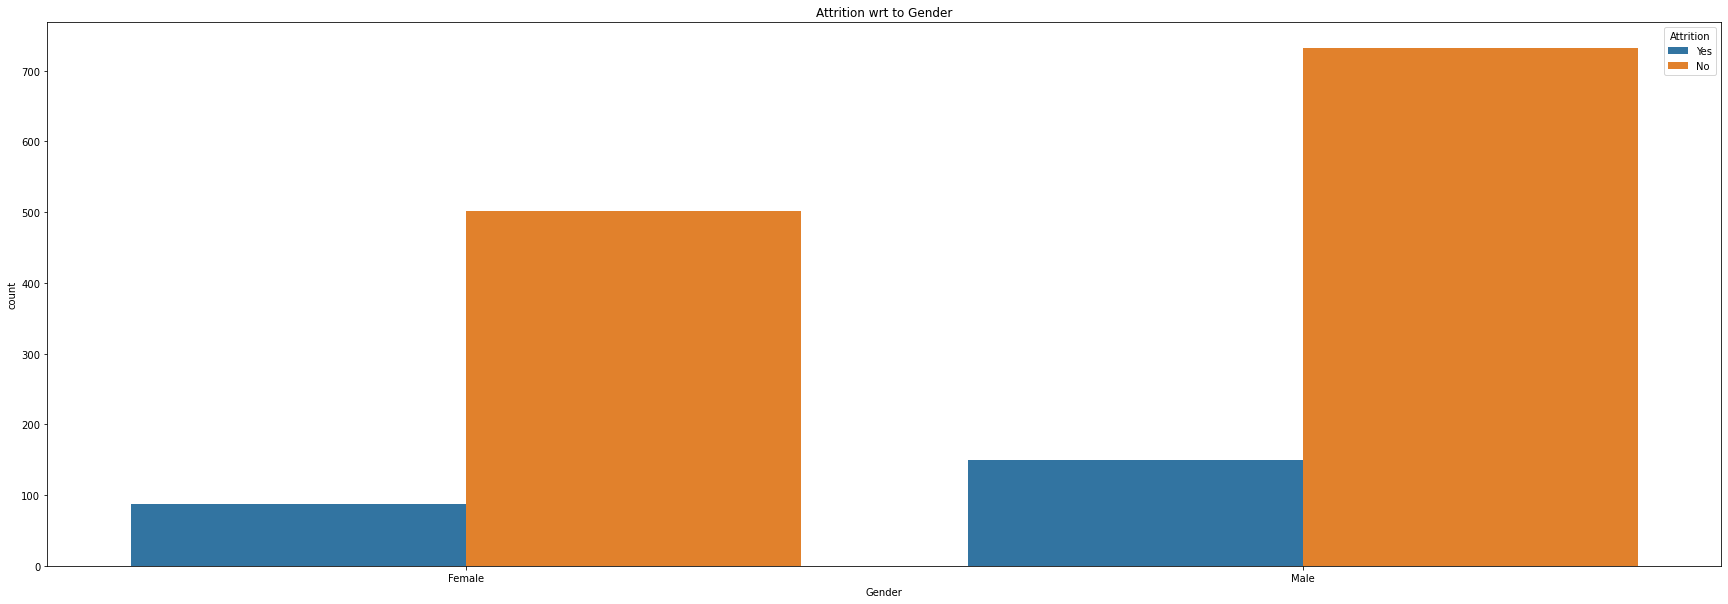

In [52]:
plt.figure(figsize = (30,10))
plt.title('Attrition wrt to Gender')
sns.countplot(x = 'Gender', hue = 'Attrition', data = hr)
plt.show()

Men are more likely to leave job than women

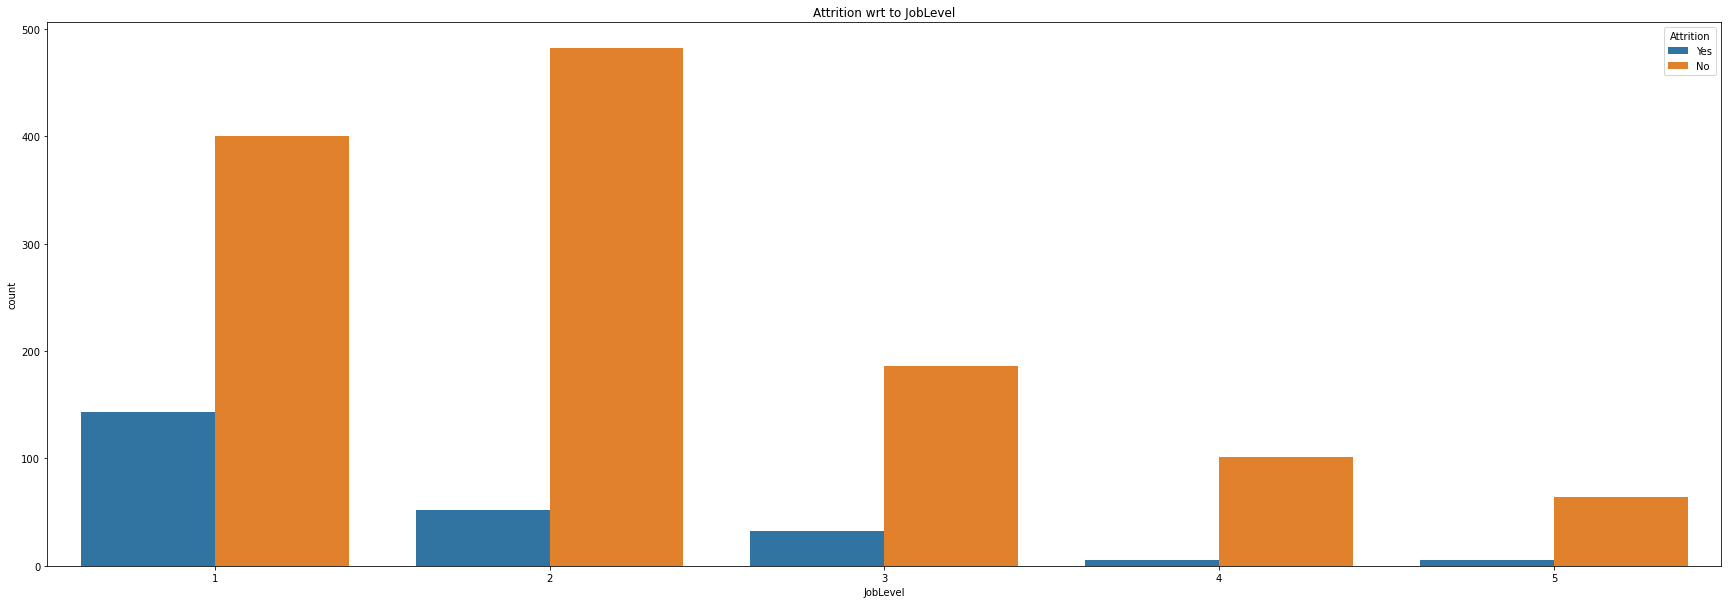

In [53]:
plt.figure(figsize = (30,10))
plt.title('Attrition wrt to JobLevel')
sns.countplot(x = 'JobLevel', hue = 'Attrition', data = hr)
plt.show()

Attrition rate increases with higher job level. People at lower level are less likely to leave job

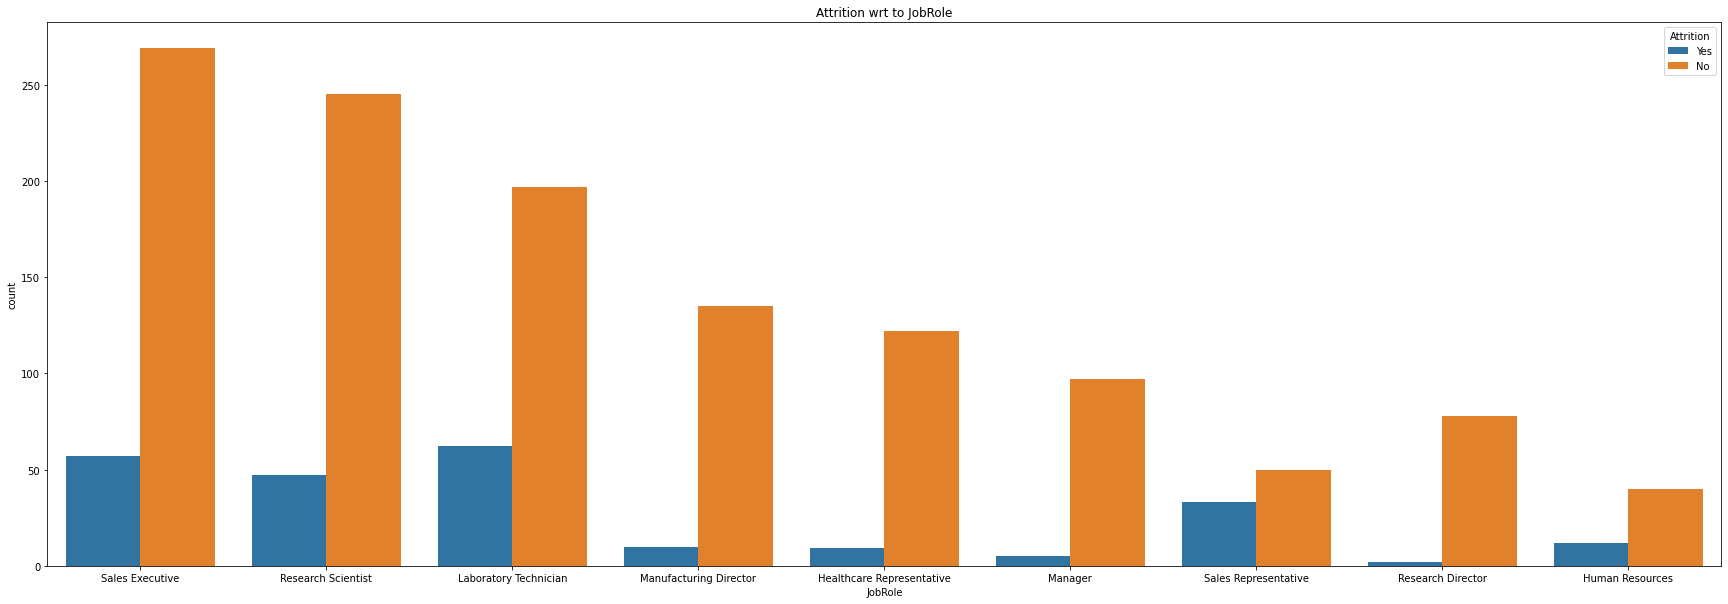

In [54]:
plt.figure(figsize = (30,10))
plt.title('Attrition wrt to JobRole')
sns.countplot(x = 'JobRole', hue = 'Attrition', data = hr)
plt.show()

Attition rate is lower in job roles like Research Director , Healthcare, Managers etc

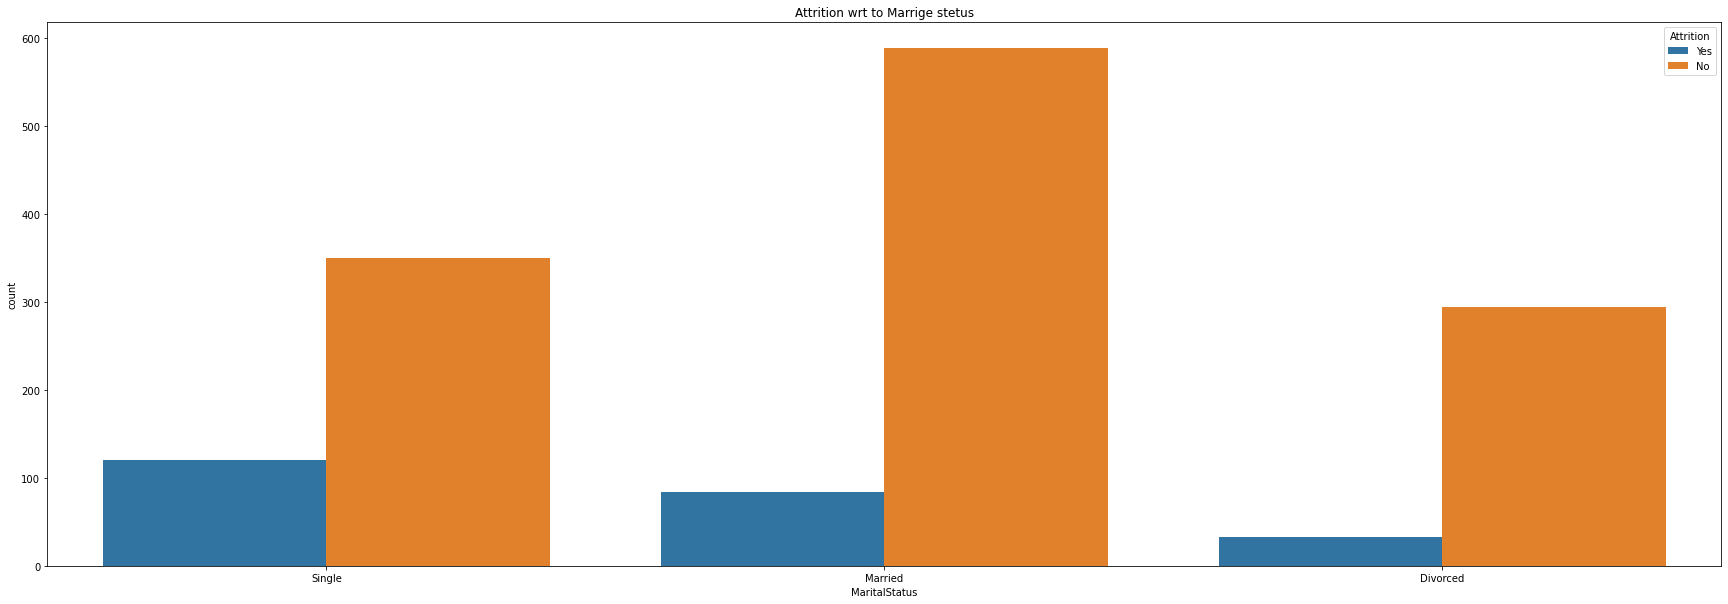

In [55]:
plt.figure(figsize = (30,10))
plt.title('Attrition wrt to Marrige stetus')
sns.countplot(x = 'MaritalStatus', hue = 'Attrition', data = hr)
plt.show()

Married people are less likely to leave job.single people tend to switch jobs little more 

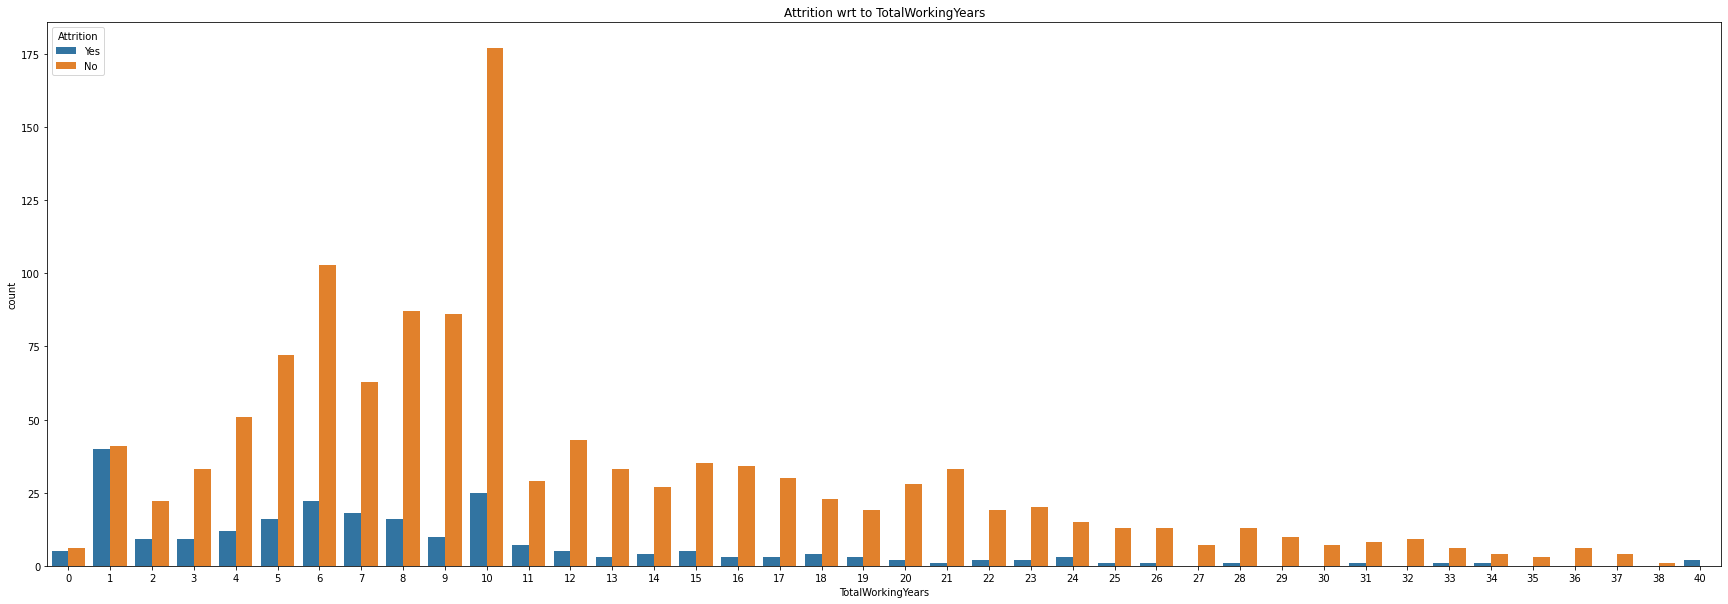

In [56]:
plt.figure(figsize = (30,10))
plt.title('Attrition wrt to TotalWorkingYears')
sns.countplot(x = 'TotalWorkingYears', hue = 'Attrition', data = hr)
plt.show()

employees with 1-10 years of job experience are more likely to leave the job

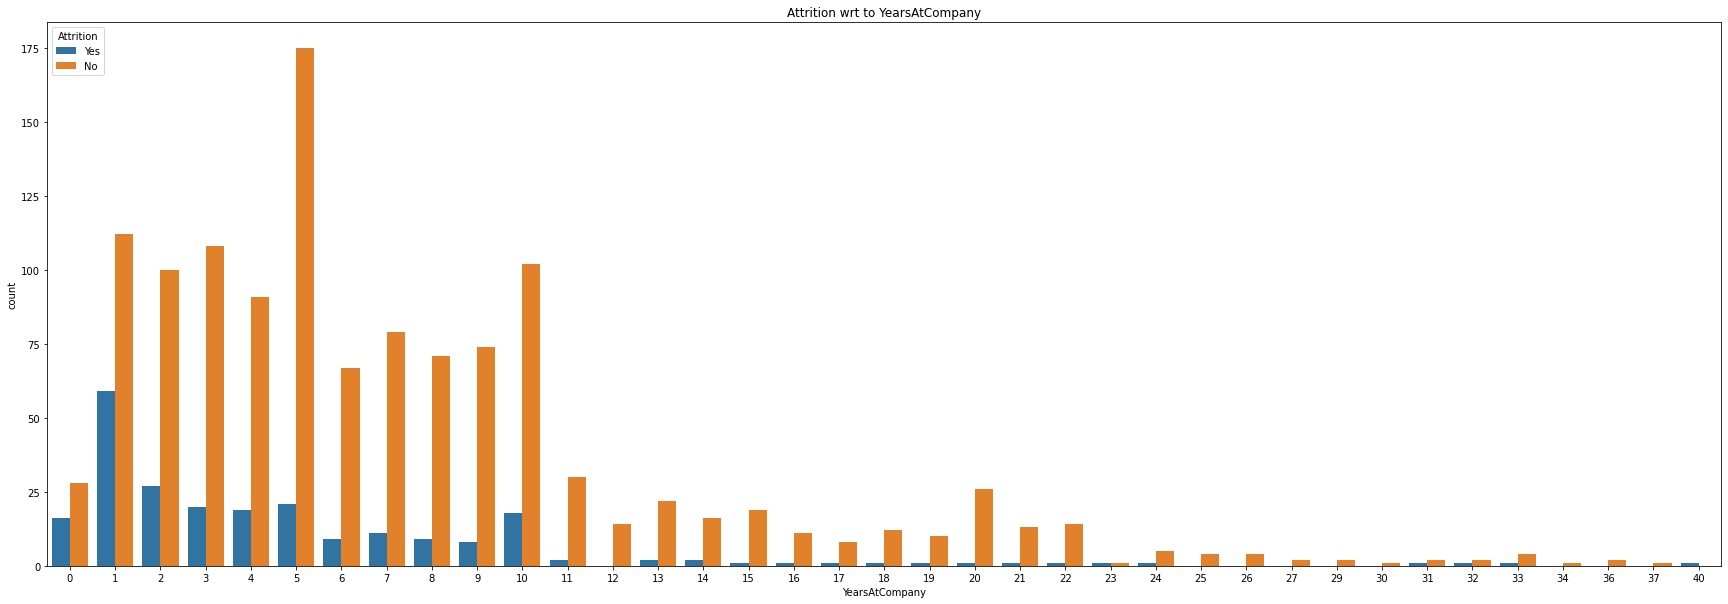

In [57]:
plt.figure(figsize = (30,10))
plt.title('Attrition wrt to YearsAtCompany')
sns.countplot(x = 'YearsAtCompany', hue = 'Attrition', data = hr)
plt.show()

In first 5 years of joining any company the attrition rate is higher

In [58]:
hr.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

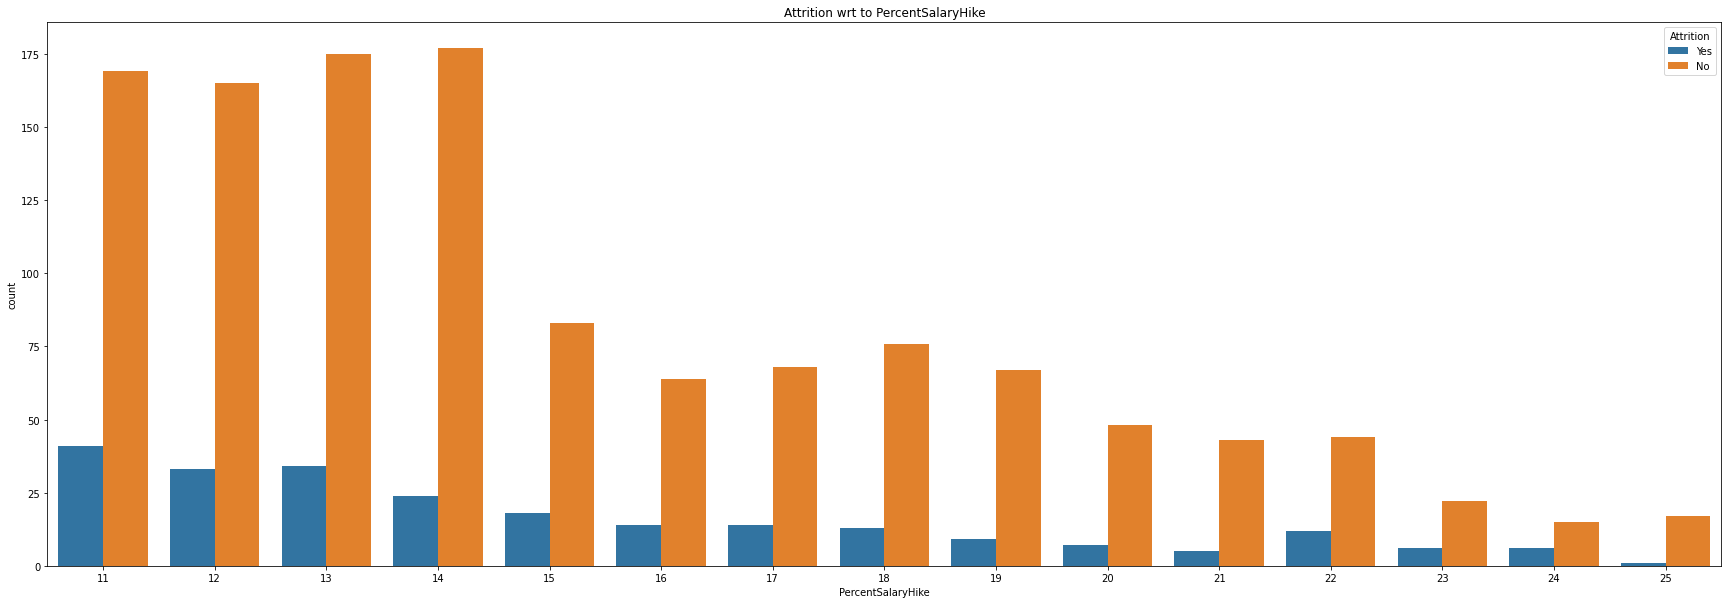

In [59]:
plt.figure(figsize = (30,10))
plt.title('Attrition wrt to PercentSalaryHike')
sns.countplot(x = 'PercentSalaryHike', hue = 'Attrition', data = hr)
plt.show()

employees with low salary hikes, are more likely to leave the job

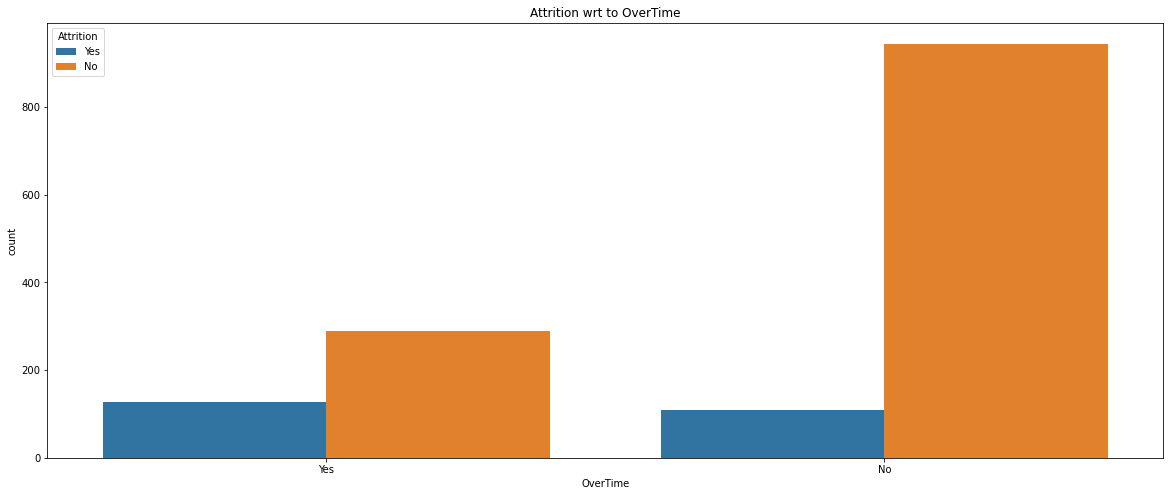

In [60]:
plt.figure(figsize = (20,8))
plt.title('Attrition wrt to OverTime')
sns.countplot(x = 'OverTime', hue = 'Attrition', data = hr)
plt.show()


employees working overtime are more likely to leave the job

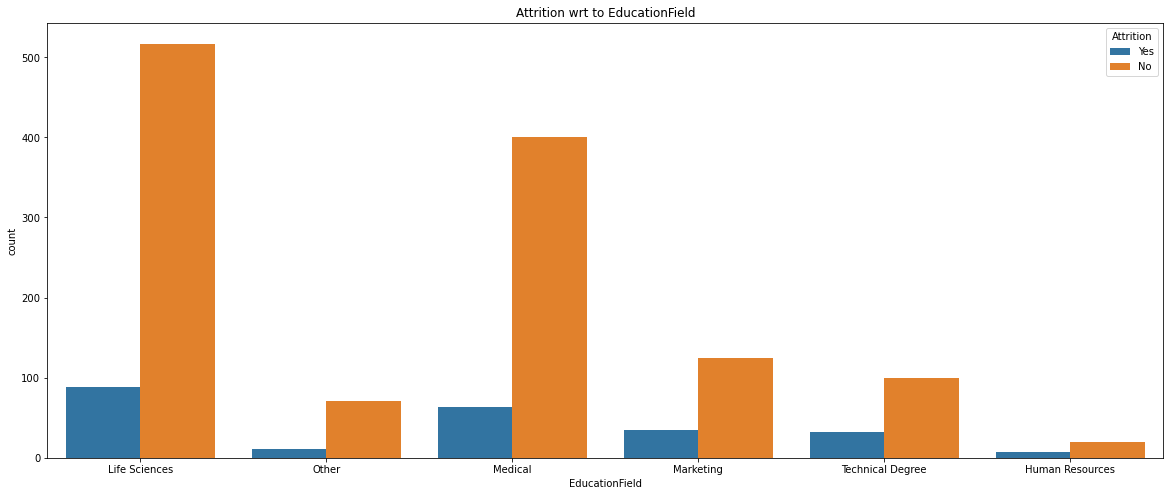

In [61]:
plt.figure(figsize = (20,8))
plt.title('Attrition wrt to EducationField')
sns.countplot(x = 'EducationField', hue = 'Attrition', data = hr)
plt.show()

It is seen that departments like marketing, Tech and HR have more Attrition rate

need to convert object columns into integers 

In [62]:
# Importing label encoder to encode the categirical columns into numbers
from sklearn.preprocessing import LabelEncoder

lr = LabelEncoder()
 

In [63]:
hr['BusinessTravel']=lr.fit_transform(hr['BusinessTravel'])

hr['Department']=lr.fit_transform(hr['Department'])

hr['EducationField']=lr.fit_transform(hr['EducationField'])

hr['Gender']=lr.fit_transform(hr['Gender'])

hr['JobRole']=lr.fit_transform(hr['JobRole'])

hr['MaritalStatus']=lr.fit_transform(hr['MaritalStatus'])

hr['OverTime']=lr.fit_transform(hr['OverTime'])

In [64]:
# Encoding the target column 

hr['Attrition']=lr.fit_transform(hr['Attrition'])

In [65]:
hr.info()
# Now We can see that all columns are integers only

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int32
 2   BusinessTravel            1470 non-null   int32
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int32
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int32
 8   EnvironmentSatisfaction   1470 non-null   int64
 9   Gender                    1470 non-null   int32
 10  HourlyRate                1470 non-null   int64
 11  JobInvolvement            1470 non-null   int64
 12  JobLevel                  1470 non-null   int64
 13  JobRole                   1470 non-null   int32
 14  JobSatisfaction           1470 non-null 

In [66]:
# Checking for correlation

corr = hr.corr()

<AxesSubplot:>

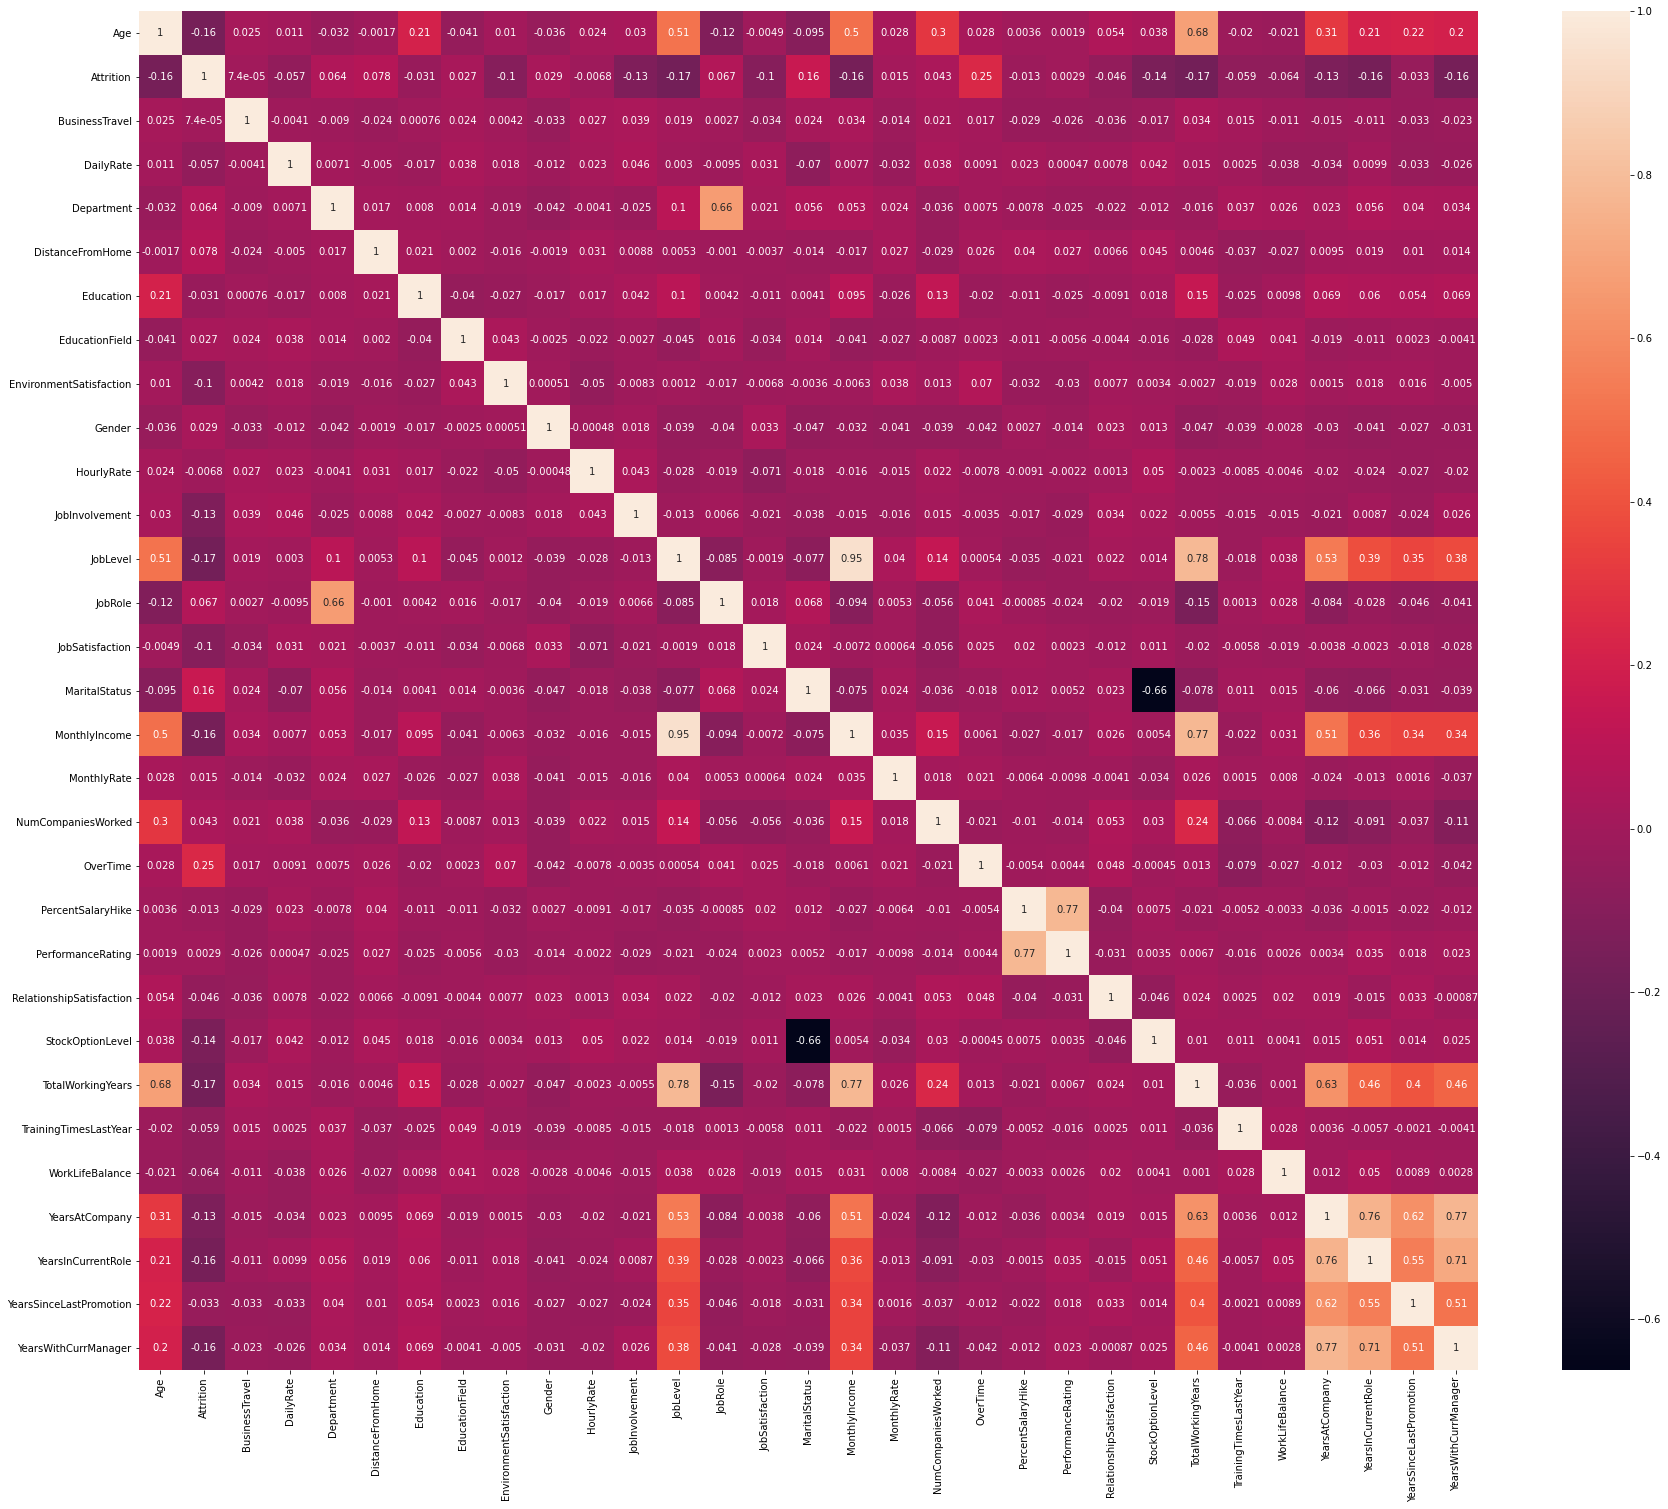

In [67]:
plt.figure(figsize = (30,25))
sns.heatmap(corr, annot = True)

* highest correlation ie 96 % exists between the job level and monthly Income which is obvious that monthly income increases with job level

* Second highest correlation exist is 78 % between Total working years  and joblevel

* 77 % correlation exists between the Total working years and monthly income

* 71 % correlation exists between Years with current maneger and Years in current role

Not dropping any correlated columns as dont want to lose any data so 

C:\Users\SREEDHAR\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\SREEDHAR\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\SREEDHAR\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\SREEDHAR\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\SREEDHAR\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\SREEDHAR\an

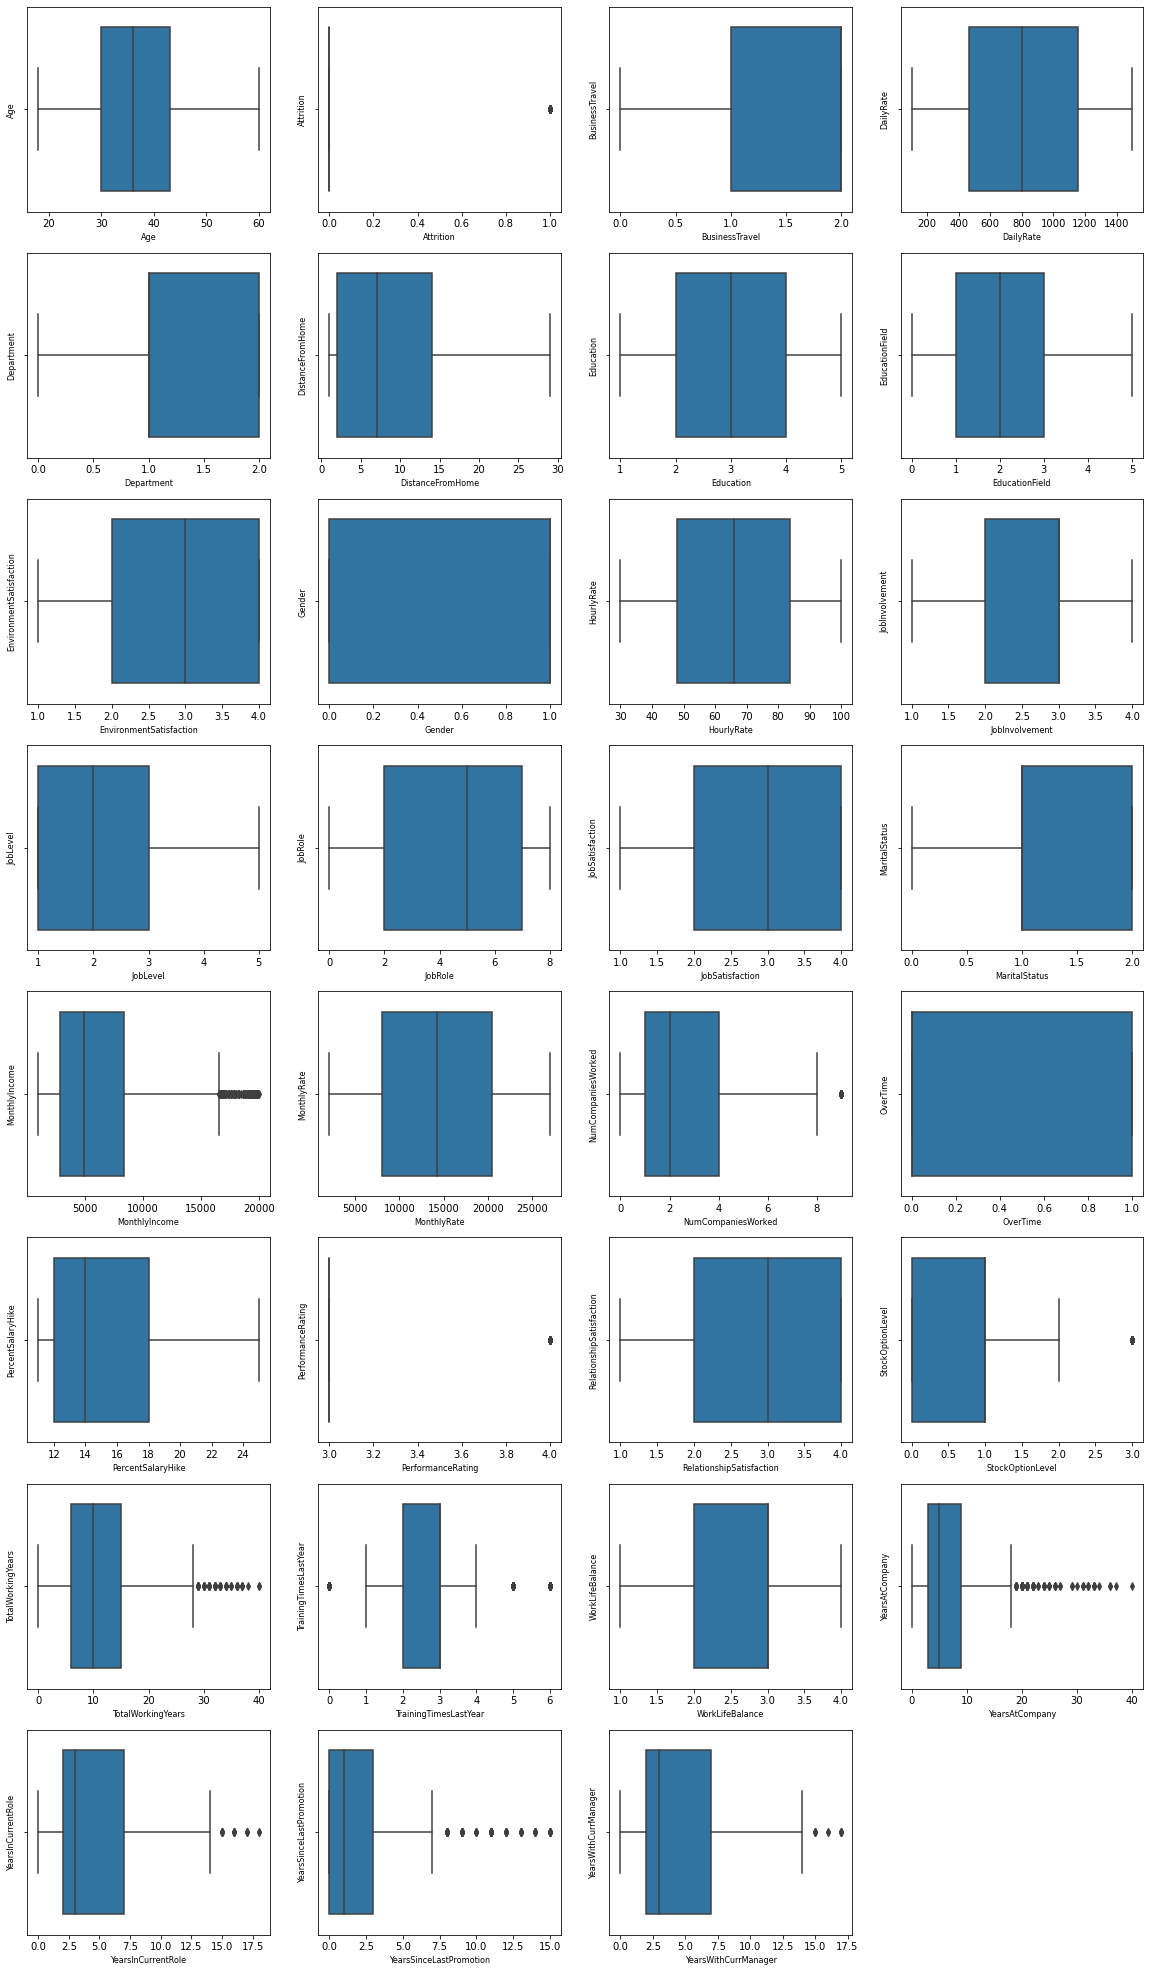

In [68]:
# Checking for Outlies

plt.figure(figsize = (20,40))
graphs = 1

for column in hr:
    if graphs <=35:
        ax = plt.subplot(9,4,graphs)
        sns.boxplot(hr[column], orient ='v')
        plt.xlabel(column,fontsize=8)
        plt.ylabel(column,fontsize=8)
    graphs+=1   
plt.show()

In [69]:
hr.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

MonthlyIncome , TotalWorkingYears , YearsAtCompany, YearsInCurrentRole , YearsSinceLastPromotion have outliers. Need to remove them before processing

In [70]:
hr.shape

(1470, 31)

In [71]:
# Using z-Square to remove outliers

from scipy.stats import zscore

In [72]:
z_score = zscore(hr[['MonthlyIncome','TotalWorkingYears','YearsAtCompany']])
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 3).all(axis=1)

hr= hr[filtering_entry]

In [73]:
hr.shape

(1434, 31)

In [74]:
print ('Data lost% is = ', ((1470-1360)/1470)*100 , '%')

Data lost% is =  7.482993197278912 %


In [75]:
#Checking for skewness
hr.skew()

Age                         0.431254
Attrition                   1.831811
BusinessTravel             -1.434820
DailyRate                  -0.016112
Department                  0.190885
DistanceFromHome            0.958114
Education                  -0.295793
EducationField              0.549677
EnvironmentSatisfaction    -0.319538
Gender                     -0.401559
HourlyRate                 -0.029655
JobInvolvement             -0.503247
JobLevel                    1.073027
JobRole                    -0.376522
JobSatisfaction            -0.339787
MaritalStatus              -0.151979
MonthlyIncome               1.455145
MonthlyRate                 0.031259
NumCompaniesWorked          1.031988
OverTime                    0.975287
PercentSalaryHike           0.815397
PerformanceRating           1.925397
RelationshipSatisfaction   -0.299523
StockOptionLevel            0.960450
TotalWorkingYears           0.940101
TrainingTimesLastYear       0.566330
WorkLifeBalance            -0.552331
Y

columns have skewness ,using power transformation to remove the same

In [76]:
# Splitting data into label and Features

In [77]:
x = hr.drop('Attrition', axis = 1)
y = hr['Attrition']

In [78]:
# Removing skewness 

from sklearn.preprocessing import power_transform

In [79]:
x_new = power_transform(x)

In [80]:
x=pd.DataFrame(x_new, columns=x.columns)

In [81]:
x.skew()

Age                        -0.006091
BusinessTravel             -0.965595
DailyRate                  -0.199873
Department                  0.015764
DistanceFromHome           -0.008807
Education                  -0.102308
EducationField             -0.008073
EnvironmentSatisfaction    -0.204114
Gender                     -0.401559
HourlyRate                 -0.105384
JobInvolvement             -0.018902
JobLevel                    0.105839
JobRole                    -0.331409
JobSatisfaction            -0.216623
MaritalStatus              -0.157369
MonthlyIncome               0.030276
MonthlyRate                -0.179388
NumCompaniesWorked          0.015100
OverTime                    0.975287
PercentSalaryHike           0.115118
PerformanceRating           0.000000
RelationshipSatisfaction   -0.191405
StockOptionLevel            0.087851
TotalWorkingYears          -0.019262
TrainingTimesLastYear       0.058706
WorkLifeBalance            -0.012424
YearsAtCompany             -0.021670
Y

Skewness removed from the dataset

In [82]:
#Since we have classification problem at first going with usual Logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split



In [83]:
# checking for best random state for data split
maxAcc = 0
maxRS=0

for i in range(0,350):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20, random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predf=LR.predict(x_test)
    acc=accuracy_score(y_test, predf)
    
    if acc>maxAcc:
        maxAcc=acc
        macRS = i
print('Best Accuracy is=',maxAcc, "Random state=",macRS)    

    

Best Accuracy is= 0.9233449477351916 Random state= 301


In [84]:
# Spitting data into training and testing dataset
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20, random_state=293)

In [85]:
LR.fit(x_train,y_train)

predict_=LR.predict(x_test)

print("Accuracy is",accuracy_score(y_test,predict_)*100)

print(confusion_matrix(y_test,predict_))
print(classification_report(y_test,predict_))

Accuracy is 88.15331010452961
[[236   8]
 [ 26  17]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       244
           1       0.68      0.40      0.50        43

    accuracy                           0.88       287
   macro avg       0.79      0.68      0.72       287
weighted avg       0.87      0.88      0.87       287



good accuracy rate but going for more advanced models for better accuracy

In [86]:
# Decision tree Classifier

from sklearn.tree import DecisionTreeClassifier

In [87]:
dt = DecisionTreeClassifier()

dt.fit(x_train,y_train)
pred = dt.predict(x_test)

print("Accuracy is",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy is 0.7560975609756098
[[203  41]
 [ 29  14]]
              precision    recall  f1-score   support

           0       0.88      0.83      0.85       244
           1       0.25      0.33      0.29        43

    accuracy                           0.76       287
   macro avg       0.56      0.58      0.57       287
weighted avg       0.78      0.76      0.77       287



In [88]:
# Random Forest 

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()


In [89]:
rf.fit(x_train,y_train)
pred = rf.predict(x_test)

print('Accuracy is',accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy is 86.7595818815331
[[242   2]
 [ 36   7]]
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       244
           1       0.78      0.16      0.27        43

    accuracy                           0.87       287
   macro avg       0.82      0.58      0.60       287
weighted avg       0.86      0.87      0.83       287



In [90]:
# Support Vector Classifier

from sklearn.svm import SVC

svc=SVC()

In [91]:
svc.fit(x_train,y_train)
new_pred = svc.predict(x_test)

print('Accuracy is',accuracy_score(y_test,new_pred)*100)
print(confusion_matrix(y_test,new_pred))
print(classification_report(y_test,new_pred))

Accuracy is 86.41114982578398
[[240   4]
 [ 35   8]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       244
           1       0.67      0.19      0.29        43

    accuracy                           0.86       287
   macro avg       0.77      0.58      0.61       287
weighted avg       0.84      0.86      0.83       287



In [92]:
# Cross Validation

In [93]:
from sklearn.model_selection import cross_val_score

In [94]:
scr = cross_val_score(LR, x,y, cv=8)
print("Cross validation score with Logistic Regression is", scr.mean())


scr = cross_val_score(rf, x,y, cv=8)
print("Cross validation score with Random Forest is", scr.mean())


scr = cross_val_score(svc, x,y, cv=8)
print("Cross validation score with SVC is", scr.mean())

Cross validation score with Logistic Regression is 0.8730640906269398
Cross validation score with Random Forest is 0.8570414338919926
Cross validation score with SVC is 0.8654058038485414


logisctic regression is best performing model. It does not have more parameters to tune and also there is very less difference between support vector model and LR model so going for tunning parameters for SVC model

In [95]:
# Hyper Parameter Tunning
from sklearn.model_selection import GridSearchCV
 

In [96]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

In [97]:
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 

In [98]:
grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.835 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.835 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.834 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.834 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.834 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.835 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.835 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.834 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.834 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.834 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.835 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [99]:
print(grid.best_params_)

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}


In [100]:
print(grid.best_estimator_)

SVC(C=1000, gamma=0.0001)


In [101]:
grid_predictions = grid.predict(x_test)

In [102]:

print('Accuracy is',accuracy_score(y_test,grid_predictions)*100)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

Accuracy is 89.54703832752612
[[240   4]
 [ 26  17]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       244
           1       0.81      0.40      0.53        43

    accuracy                           0.90       287
   macro avg       0.86      0.69      0.74       287
weighted avg       0.89      0.90      0.88       287



In [103]:
# Plotting ROC AUC Curve

In [104]:
from sklearn.metrics import plot_roc_curve

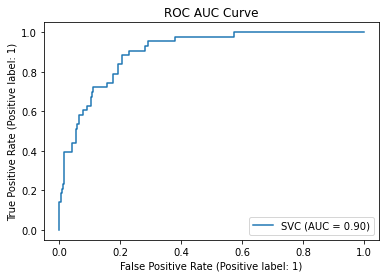

In [105]:
plot_roc_curve(grid.best_estimator_,x_test, y_test)

plt.title("ROC AUC Curve")

plt.show()

In [106]:
# Saving Model

In [107]:
import joblib


joblib.dump(grid.best_estimator_,"HR_Analytics")

['HR_Analytics']